# `In this file I will try to implement part b using a multilayer neural network`

In [1]:
# Package imports
import numpy as np
import sklearn
import sklearn.linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(777)


### Load the data

In [2]:
import pandas as pd
np.random.seed(777)
df = pd.read_csv('..//Data//Vehicles.csv', header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200,204,bus
1,91,36,72,162,60,8,150,44,19,133,166,334,121,63,2,22,196,205,saab
2,91,41,64,148,61,8,129,51,18,142,161,249,153,68,6,12,194,201,van
3,86,39,58,125,55,5,117,57,17,134,140,204,148,69,7,6,190,194,van
4,95,53,95,202,65,10,193,34,22,160,220,559,237,71,3,2,188,196,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184,opel
842,104,55,107,222,68,11,218,31,24,173,232,703,229,71,3,10,188,199,saab
843,94,38,84,158,55,9,169,39,20,130,196,430,155,69,9,15,190,195,opel
844,104,52,100,191,59,9,197,33,23,158,218,583,234,70,10,10,191,198,saab


### Normalize the data using MinMax scaler

In [3]:
scaler = preprocessing.MinMaxScaler().fit(df[df.columns[:-1]])
results = scaler.transform(df[df.columns[:-1]])
df[df.columns[:-1]] = results
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.586957,0.115385,0.458333,0.414847,0.285714,0.075472,0.326797,0.400000,0.250000,0.128571,0.310526,0.260192,0.100629,0.171053,0.272727,0.463415,0.800000,0.766667,bus
1,0.391304,0.115385,0.444444,0.253275,0.142857,0.113208,0.248366,0.514286,0.166667,0.214286,0.189474,0.179856,0.075472,0.052632,0.090909,0.536585,0.666667,0.800000,saab
2,0.391304,0.307692,0.333333,0.192140,0.153846,0.113208,0.111111,0.714286,0.083333,0.342857,0.163158,0.077938,0.276730,0.118421,0.272727,0.292683,0.600000,0.666667,van
3,0.282609,0.230769,0.250000,0.091703,0.087912,0.056604,0.032680,0.885714,0.000000,0.228571,0.052632,0.023981,0.245283,0.131579,0.318182,0.146341,0.466667,0.433333,van
4,0.478261,0.769231,0.763889,0.427948,0.197802,0.150943,0.529412,0.228571,0.416667,0.600000,0.473684,0.449640,0.805031,0.157895,0.136364,0.048780,0.400000,0.500000,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.152174,0.153846,0.236111,0.052402,0.087912,0.075472,0.084967,0.800000,0.083333,0.100000,0.063158,0.053957,0.144654,0.289474,0.363636,0.121951,0.066667,0.100000,opel
842,0.673913,0.846154,0.930556,0.515284,0.230769,0.169811,0.692810,0.142857,0.583333,0.785714,0.536842,0.622302,0.754717,0.157895,0.136364,0.243902,0.400000,0.600000,saab
843,0.456522,0.192308,0.611111,0.235808,0.087912,0.132075,0.372549,0.371429,0.250000,0.171429,0.347368,0.294964,0.289308,0.131579,0.409091,0.365854,0.466667,0.466667,opel
844,0.673913,0.730769,0.833333,0.379913,0.131868,0.132075,0.555556,0.200000,0.500000,0.571429,0.463158,0.478417,0.786164,0.144737,0.454545,0.243902,0.500000,0.566667,saab


### Encode y

In [4]:
X = df[df.columns[:-1]].to_numpy()
y = pd.get_dummies(df[18]).to_numpy()
y

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

### Train val test split

In [42]:
trainx, testx, trainy, testy = train_test_split(X,y, stratify=y, test_size=.3)
valx, testx, valy, testy = train_test_split(testx,testy, stratify=testy, test_size=.5)
trainx, valx, testx, trainy, valy, testy = trainx.T, valx.T, testx.T, trainy.T, valy.T, testy.T
trainx.shape, valx.shape, testx.shape, trainy.shape, valy.shape, testy.shape


((18, 592), (18, 127), (18, 127), (4, 592), (4, 127), (4, 127))

In [6]:
def model_architecture(X, Y):

    n_x = X.shape[0] # size of input layer
    n_h = 10
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [7]:
def initialize_parameters(n_x, n_h, n_y):

    
    np.random.seed(2)

    
    ### START CODE HERE ###
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                  }
    
    return parameters

In [8]:
def sigmoid(x):

    return 1/(1+np.exp(-x))



In [9]:
def softmax(x):
    return np.exp(x)/np.exp(x).sum()

def softmax_vector(x):
    return np.array([softmax(entry) for entry in x.T]).T


In [10]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # xx= 592x18 w= 10x18
    Z1 = W1 @ X + b1
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1 + b2
    # A2 = sigmoid(Z2)
    A2 = softmax_vector(Z2)
    # print(W1.shape, W2.shape, b1.shape, b2.shape, Z1.shape, A1.shape, Z2.shape, A2.shape)

    #z1 = 592x10
    #z2 = 592x4
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:
def compute_loss(A2, Y):  

    logprobs = np.multiply(np.log(A2),Y)
    loss = -1 *  np.sum(logprobs)  

    loss = float(np.squeeze(loss))

    assert(isinstance(loss, float))
    
    return loss

In [12]:
def backprop(parameters, cache, X, Y):

    m = X.shape[1]
  
    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2-Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [13]:
def update(parameters, grads, learning_rate = 0.01):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
  
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
def NeuralNetwork(X, Y, n_h, num_iterations = 1000, learning_rate = 0.01, print_loss=False):

    np.random.seed(3)
    n_x = model_architecture(X, Y)[0]
    n_y = model_architecture(X, Y)[2]

    parameters = initialize_parameters(n_x,n_h,n_y)
 

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        loss = compute_loss(A2,Y)
        grads = backprop(parameters,cache,X,Y)
        parameters =  update(parameters,grads)
    
        if print_loss and i % 100 == 0:
            print ("loss after iteration %i: %f" %(i, loss))

    return parameters

In [15]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [16]:
# Build a model with a n_h-dimensional hidden layer
parameters =  NeuralNetwork(trainx, trainy,20, num_iterations = 100000, learning_rate = 0.01, print_loss=True)

loss after iteration 0: 820.809691
loss after iteration 100: 820.577396
loss after iteration 200: 820.417926
loss after iteration 300: 820.299527
loss after iteration 400: 820.202092
loss after iteration 500: 820.112059
loss after iteration 600: 820.019392
loss after iteration 700: 819.915717
loss after iteration 800: 819.793090
loss after iteration 900: 819.643136
loss after iteration 1000: 819.456372
loss after iteration 1100: 819.221653
loss after iteration 1200: 818.925695
loss after iteration 1300: 818.552685
loss after iteration 1400: 818.084025
loss after iteration 1500: 817.498268
loss after iteration 1600: 816.771340
loss after iteration 1700: 815.877093
loss after iteration 1800: 814.788209
loss after iteration 1900: 813.477356
loss after iteration 2000: 811.918415
loss after iteration 2100: 810.087538
loss after iteration 2200: 807.963910
loss after iteration 2300: 805.530307
loss after iteration 2400: 802.773789
loss after iteration 2500: 799.686991
loss after iteration 260

### Prediction on the training set

In [17]:
# Print accuracy
predictions = predict(parameters, trainx)
print(accuracy_score(trainy.T, predictions.T))


0.8631756756756757


### Prediction on the validation set

In [18]:
# Print accuracy
predictions = predict(parameters, valx)
print(accuracy_score(valy.T, predictions.T))


0.7322834645669292


### Combine training and validation sets and re-train

In [19]:
valx.shape, trainx.shape
valy.shape, trainy.shape

((4, 127), (4, 592))

In [20]:
train_val_x = np.concatenate((valx.T,trainx.T)).T
train_val_y = np.concatenate((valy.T,trainy.T)).T
parameters =  NeuralNetwork(train_val_x, train_val_y,30, num_iterations = 150000, learning_rate = 0.01, print_loss=True)



loss after iteration 0: 996.781984
loss after iteration 100: 996.449766
loss after iteration 200: 996.196805
loss after iteration 300: 995.979363
loss after iteration 400: 995.767725
loss after iteration 500: 995.539350
loss after iteration 600: 995.274748
loss after iteration 700: 994.954850
loss after iteration 800: 994.559247
loss after iteration 900: 994.064971
loss after iteration 1000: 993.445699
loss after iteration 1100: 992.671384
loss after iteration 1200: 991.708378
loss after iteration 1300: 990.520133
loss after iteration 1400: 989.068521
loss after iteration 1500: 987.315651
loss after iteration 1600: 985.225922
loss after iteration 1700: 982.767952
loss after iteration 1800: 979.916081
loss after iteration 1900: 976.651523
loss after iteration 2000: 972.963574
loss after iteration 2100: 968.851490
loss after iteration 2200: 964.327364
loss after iteration 2300: 959.419647
loss after iteration 2400: 954.176231
loss after iteration 2500: 948.665538
loss after iteration 260

### Prediction on the test set

In [43]:
predictions_test = predict(parameters,testx)
print(accuracy_score(testy.T, predictions_test.T))


0.8582677165354331


### Confusion matrix

array([0, 2, 1, 2, 0, 3, 0, 0, 2, 2, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 3,
       2, 1, 1, 3, 0, 0, 0, 1, 3, 3, 2, 0, 3, 3, 1, 0, 2, 3, 3, 3, 3, 0,
       3, 1, 0, 2, 2, 1, 3, 0, 3, 2, 3, 2, 0, 2, 3, 1, 0, 0, 2, 3, 2, 0,
       2, 0, 2, 0, 1, 1, 3, 2, 0, 1, 2, 2, 0, 3, 2, 1, 0, 0, 3, 0, 1, 2,
       3, 0, 1, 3, 0, 2, 0, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3], dtype=int64)

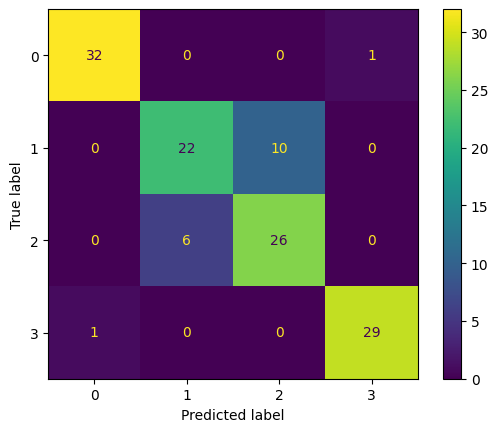

In [44]:
testy = np.argmax(testy.T, axis=1)
predictions_test = np.argmax(predictions_test.T, axis=1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(testy, predictions_test)
ConfusionMatrixDisplay(confusion).plot()

predictions_test
